In [27]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score


In [3]:
df = pd.read_csv(r'C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\SVM_Numerical\HR_comma_sep.csv')

In [4]:
print(df.columns)
df.info()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memo

In [5]:
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.44,0.57,2,141,3,0,1,0,product_mng,medium
1,0.55,0.96,3,194,3,0,0,0,product_mng,medium
2,0.72,0.67,5,210,2,0,0,0,management,medium
3,0.96,0.75,4,177,2,0,0,0,IT,low
4,0.96,0.54,3,198,3,0,0,0,support,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.52,0.57,3,270,3,0,0,0,RandD,low
14995,0.59,0.79,4,209,2,0,0,0,technical,medium
14996,0.69,0.94,5,259,2,0,0,0,IT,medium
14997,0.78,0.59,5,236,3,0,0,0,technical,high


In [6]:
print(df['salary'].unique())
print(df['Department'].unique())

['medium' 'low' 'high']
['product_mng' 'management' 'IT' 'support' 'marketing' 'technical' 'sales'
 'accounting' 'RandD' 'hr']


In [7]:
df = df.replace({'salary' :{'low':0,'medium':1,'high':2}})

In [8]:
print(df['salary'].unique())

[1 0 2]


In [9]:
df = pd.get_dummies(df, drop_first=False)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.44,0.57,2,141,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.55,0.96,3,194,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0.72,0.67,5,210,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.96,0.75,4,177,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.96,0.54,3,198,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.52,0.57,3,270,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14995,0.59,0.79,4,209,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1
14996,0.69,0.94,5,259,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0
14997,0.78,0.59,5,236,3,0,0,0,2,0,0,0,0,0,0,0,0,0,1


In [25]:
corrM = df.corr()
corrM

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.050022,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,-0.013002,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,-0.001803,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002242,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.048715,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.009247,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.098119,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.061788
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,1.000000,-0.010959,0.002800,0.012759,0.004599,0.156665,0.011599,-0.007669,-0.035599,-0.029888,-0.018630,-0.157898
Department_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.038942,-0.010959,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.010925
Department_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,0.021268,0.002800,-0.070240,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.046596


<AxesSubplot:>

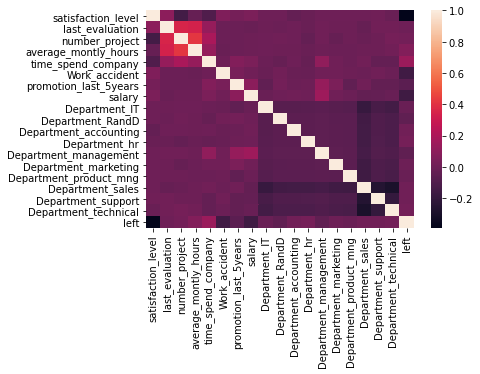

In [26]:
sns.heatmap(corrM, annot=False)

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

In [11]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'left']

In [12]:
df = df[cols]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left
0,0.44,0.57,2,141,3,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,0.55,0.96,3,194,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0.72,0.67,5,210,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0.96,0.75,4,177,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.96,0.54,3,198,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
feature=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical']]
X=np.asarray(feature)
y=np.asarray(df['left'])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=27)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(11999, 18)
(11999,)
(3000, 18)
(3000,)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', random_state=128, C = 2500)
clf.fit(X_train, y_train)

SVC(C=2500, random_state=128)

In [17]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_test[0:5])
print(y_pred[0:5])

[1 0 0 0 0]
[1 0 0 0 0]


In [18]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average="macro"))

Accuracy: 0.9736666666666667
Precision: 0.9601259172509385


In [19]:
# Model Recall: what percentage of positive tuples are labelled as such?
recall_average = recall_score(y_test,y_pred, average="micro")
print("Recall:",recall_average)

Recall: 0.9736666666666667


In [21]:
y_pred2 = clf.predict(X_train)

In [30]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[2186,   54],
       [  25,  735]], dtype=int64)

<AxesSubplot:>

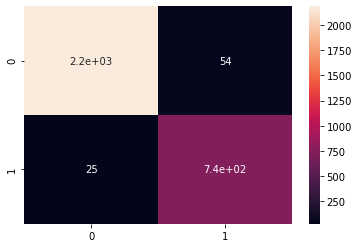

In [31]:
sns.heatmap(conf_matrix, annot=True)

In [34]:
conf2_matrix = confusion_matrix(y_train, y_pred2)
conf2_matrix

array([[9141,   47],
       [  43, 2768]], dtype=int64)

<AxesSubplot:>

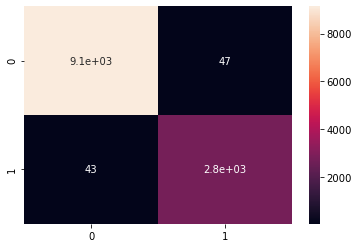

In [33]:
sns.heatmap(conf2_matrix, annot=True)

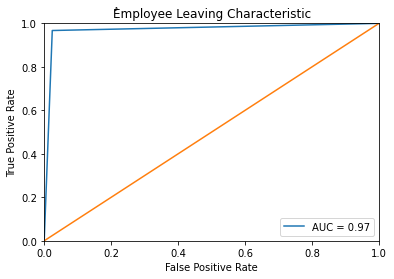

In [35]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) #fpr = False Positive Rate, tpr = True Positive Rate
roc_auc = metrics.auc(fpr, tpr)

plt.title('ُEmployee Leaving Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

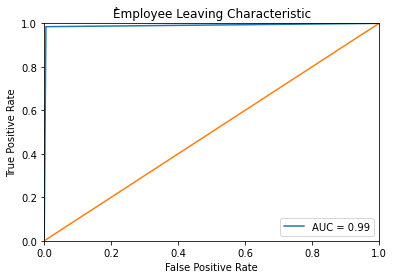

In [36]:
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred2) #fpr = False Positive Rate, tpr = True Positive Rate
roc_auc = metrics.auc(fpr, tpr)

plt.title('ُEmployee Leaving Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()